# Industrial Copper Modeling

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import IsolationForest
import scipy.stats as stat
from scipy.stats import boxcox
import pylab
from sklearn.impute import SimpleImputer 


In [2]:
df=pd.read_excel('Copper_Set.xlsx')
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB
None


In [4]:
df1=df.copy()
df1.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [6]:
print(df1.info())
print(df1.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB
None
(181673, 14)


In [7]:
col_name={'quantity tons':'quantity_tons','item type':'item_type','delivery date':'delivery_date'}
df1.rename(columns=col_name, inplace=True)


In [8]:
df1.nunique()

id               181671
item_date           252
quantity_tons    181673
customer           1169
country              17
status                9
item_type             7
application          30
thickness           594
width              1386
material_ref      16563
product_ref          33
delivery_date        28
selling_price      9795
dtype: int64

In [10]:
for col in df1.columns:
    print(f"{col} - {len(df1[col].unique())}") 


id - 181672
item_date - 253
quantity_tons - 181673
customer - 1170
country - 18
status - 10
item_type - 7
application - 31
thickness - 595
width - 1386
material_ref - 16564
product_ref - 33
delivery_date - 29
selling_price - 9796


In [11]:
df1.isnull().sum()

id                   2
item_date            1
quantity_tons        0
customer             1
country             28
status               2
item_type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery_date        1
selling_price        1
dtype: int64

In [12]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181672.0,2.020459e+07,4.551119e+03,19950000.00,20200929.0,20201130.0,2.021020e+07,2.021040e+07
customer,181672.0,3.051221e+07,2.433382e+07,12458.00,30196884.0,30205242.0,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,25.00,26.0,30.0,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.00,10.0,15.0,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,0.18,0.7,1.5,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00,1180.0,1250.0,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00,611993.0,640665.0,1.332077e+09,1.722208e+09
delivery_date,181672.0,2.020738e+07,2.411059e+04,20190401.00,20201101.0,20210101.0,2.021040e+07,3.031010e+07
selling_price,181672.0,1.918036e+03,3.317956e+05,-1160.00,669.0,812.0,9.530000e+02,1.000010e+08


In [32]:
print(df1.duplicated().sum())

0


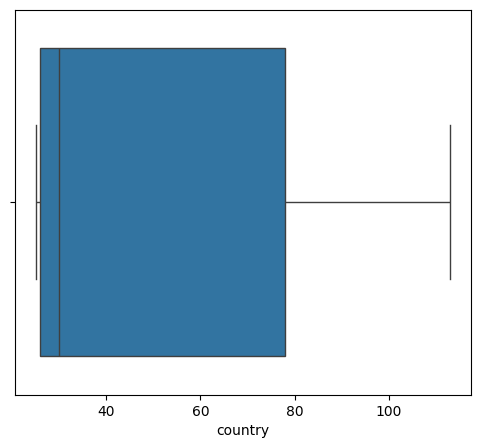

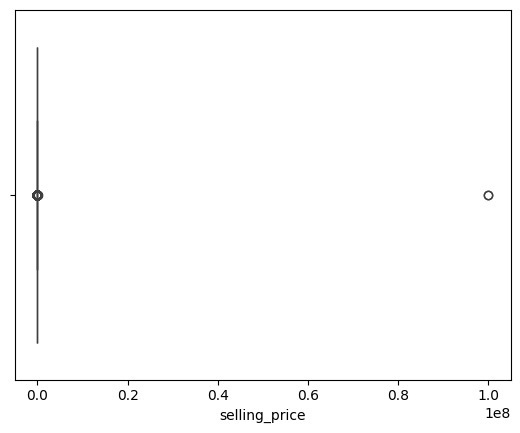

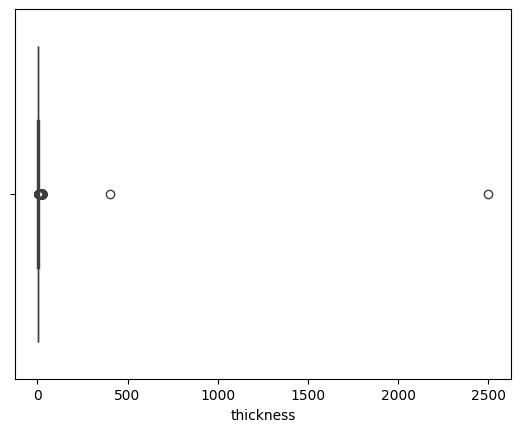

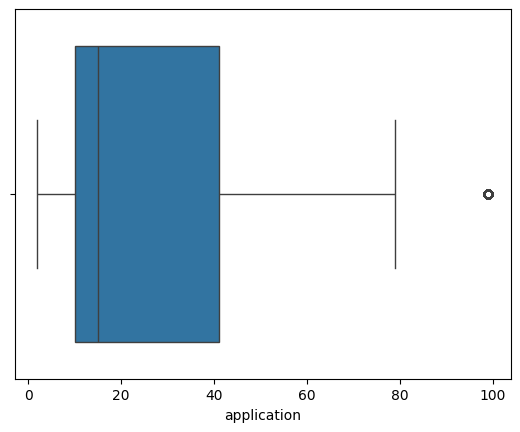

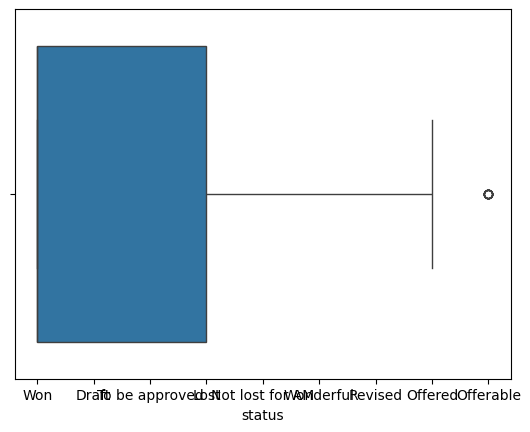

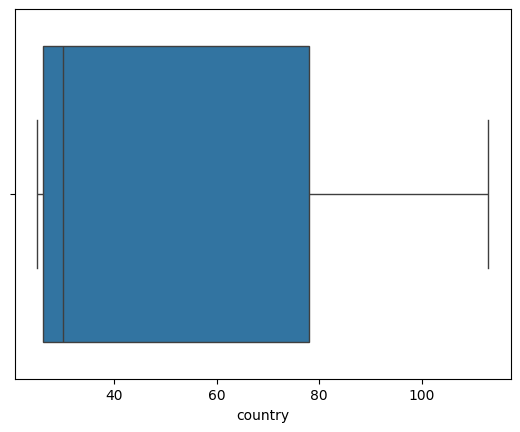

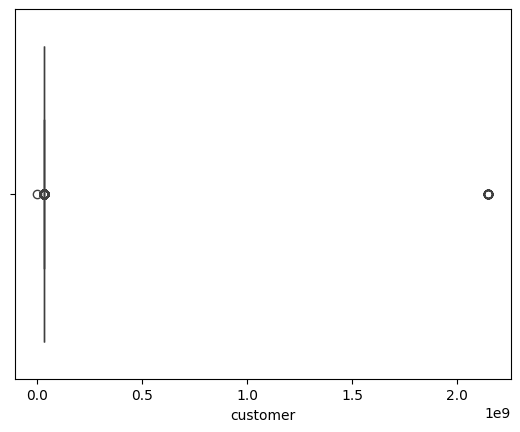

In [13]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(data=df1,x='country')
plt.show()
sns.boxplot(data=df1,x='selling_price')
plt.show()
sns.boxplot(data=df1,x='thickness')
plt.show()
sns.boxplot(data=df1,x='application')
plt.show()
sns.boxplot(data=df1,x='status')
plt.show()
sns.boxplot(data=df1,x='country')
plt.show()
sns.boxplot(data=df1,x='customer')
plt.show()

In [14]:
df1.id=df1.id.fillna('NA')
df1.status = df1.status.fillna(df1.status.mode()[0])
df1.customer=df1.customer.fillna(df1.customer.median())
df1.country=df1.country.fillna(df1.country.median())
df1.application=df1.application.fillna(df1.application.median())
df1.thickness=df1.thickness.fillna(df1.thickness.median())
df['material_ref'] = np.where(df['material_ref'].astype(str).str.startswith('00000'), np.nan, df['material_ref'])


In [15]:
print(df1.isnull().sum())
print(df1.shape)

id                   0
item_date            1
quantity_tons        0
customer             0
country              0
status               0
item_type            0
application          0
thickness            0
width                0
material_ref     77919
product_ref          0
delivery_date        1
selling_price        1
dtype: int64
(181673, 14)


In [16]:
type_dict = {'id': 'str', 'quantity_tons': 'float32','customer':'int64','country':'int8','status':'category','item_type':'category','application':'int8',
            'thickness':'float32','width':'int32','product_ref':'int64','selling_price':'float64'}


In [17]:
df1.quantity_tons = df1.quantity_tons.replace('e', 0)


C:\Users\sansu\AppData\Local\Temp\ipykernel_2872\955684390.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1.quantity_tons = df1.quantity_tons.replace('e', 0)


In [18]:
num=df1.select_dtypes(include=['int','float']).columns
for col in num:
    print(f"{col} -  {(df1[col] <= 0).sum()}")


item_date -  0
quantity_tons -  5
customer -  0
country -  0
application -  0
thickness -  0
width -  0
product_ref -  0
delivery_date -  0
selling_price -  7


In [19]:
col_to_mask=['quantity_tons', 'selling_price']
df1[col_to_mask] =df1[col_to_mask] .mask(df1[col_to_mask] <= 0, np.nan)


In [20]:

df1 = df1.astype(type_dict)

df1.item_date = pd.to_datetime(df1.item_date,format='%Y%m%d', errors='coerce').dt.date
df1.delivery_date = pd.to_datetime(df1.delivery_date,format='%Y%m%d', errors='coerce').dt.date
df1.item_date = df1.item_date.ffill()
df1.delivery_date = df1.delivery_date.bfill()
df1.item_date=df1.item_date.astype('datetime64[s]')
df1.delivery_date=df1.delivery_date.astype('datetime64[ns]')
df1.selling_price=df1.selling_price.fillna(df1.selling_price.median())
df1.quantity_tons=df1.quantity_tons.fillna(df1.quantity_tons.median())
df1 = df1.drop(columns=['material_ref'])

In [21]:
print(df1.isnull().sum())
df1.info()

id               0
item_date        0
quantity_tons    0
customer         0
country          0
status           0
item_type        0
application      0
thickness        0
width            0
product_ref      0
delivery_date    0
selling_price    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             181673 non-null  object        
 1   item_date      181673 non-null  datetime64[s] 
 2   quantity_tons  181673 non-null  float32       
 3   customer       181673 non-null  int64         
 4   country        181673 non-null  int8          
 5   status         181673 non-null  category      
 6   item_type      181673 non-null  category      
 7   application    181673 non-null  int8          
 8   thickness      181673 non-null  float32       
 9   width          181673 non-null  int32         
 10  

In [22]:
df1.describe().T


,count,mean,min,25%,50%,75%,max,std
item_date,181673,2020-11-26 22:57:42,2020-07-02 00:00:00,2020-09-29 00:00:00,2020-11-30 00:00:00,2021-02-03 00:00:00,2021-04-01 00:00:00,NaN
quantity_tons,181673.0,5874.905762,0.00001,10.971669,30.365013,67.160385,1000000000.0,2349074.75
customer,181673.0,30512207.3383,12458.0,30196884.0,30205242.0,30280416.0,2147483647.0,24333748.622752
country,181673.0,44.890727,25.0,26.0,30.0,78.0,113.0,24.403034
application,181673.0,25.614406,2.0,10.0,15.0,41.0,99.0,17.753421
thickness,181673.0,2.564822,0.18,0.7,1.5,3.0,2500.0,6.572303
width,181673.0,1295.285898,1.0,1180.0,1250.0,1500.0,2990.0,261.634673
product_ref,181673.0,473967910.724318,611728.0,611993.0,640665.0,1332077137.0,1722207579.0,717510064.710402
delivery_date,181673,2021-01-25 22:44:33.431935232,2019-04-01 00:00:00,2020-11-01 00:00:00,2021-01-01 00:00:00,2021-04-01 00:00:00,2022-01-01 00:00:00,NaN
selling_price,181673.0,1918.075544,0.1,669.0,812.0,953.0,100001015.0,331794.729145


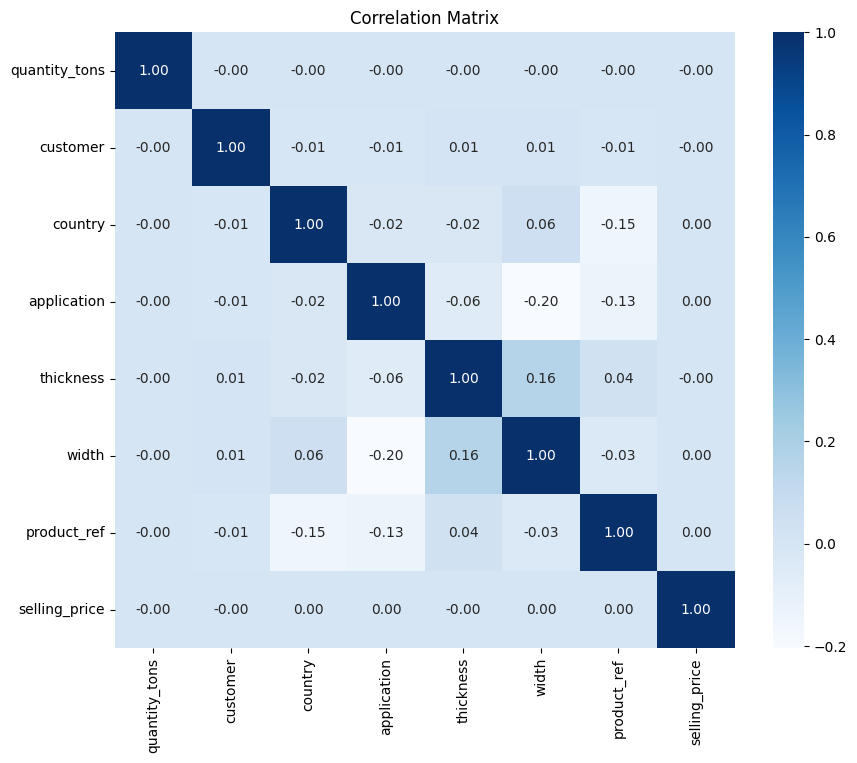

In [31]:
cor=df1.select_dtypes(include='number')
plt.figure(figsize=(10,8))
sns.heatmap(cor.corr(),annot=True,fmt='.2f',cmap= 'Blues')
plt.title('Correlation Matrix')
plt.show()

In [33]:
print(df1.status.unique())
print(df1.status.value_counts())

['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM', 'Wonderful', 'Revised', 'Offered', 'Offerable']
Categories (9, object): ['Draft', 'Lost', 'Not lost for AM', 'Offerable', ..., 'Revised', 'To be approved', 'Won', 'Wonderful']
status
Won                116012
Lost                34438
Not lost for AM     19573
Revised              4276
To be approved       4170
Draft                3140
Offered                53
Offerable              10
Wonderful               1
Name: count, dtype: int64


In [34]:
print(df1.item_type.unique())
print(df1.item_type.value_counts())


['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR']
Categories (7, object): ['IPL', 'Others', 'PL', 'S', 'SLAWR', 'W', 'WI']
item_type
W         105615
S          69236
PL          5660
Others       610
WI           524
IPL           27
SLAWR          1
Name: count, dtype: int64


In [36]:
# df1['status_En']=df1.status.map({'Lost':0,'Won':1, 'Draft':2, 'To be approved':3, 'Not lost for AM':4, 'Wonderful':1, 'Revised':5, 'Offered':6, 'Offerable':7}).astype('int8')
df1['item_type_En'] = OrdinalEncoder().fit_transform(df1[['item_type']]).astype('int8')
df1['status_En']=OrdinalEncoder().fit_transform(df1[['status']]).astype('int8')


In [38]:
print(df1.status.unique() , "\n" , df1.status_En.unique())
print(df1.status.value_counts(),"\n", df1.status_En.value_counts()) 

['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM', 'Wonderful', 'Revised', 'Offered', 'Offerable']
Categories (9, object): ['Draft', 'Lost', 'Not lost for AM', 'Offerable', ..., 'Revised', 'To be approved', 'Won', 'Wonderful'] 
 [7 0 6 1 2 8 5 4 3]
status
Won                116012
Lost                34438
Not lost for AM     19573
Revised              4276
To be approved       4170
Draft                3140
Offered                53
Offerable              10
Wonderful               1
Name: count, dtype: int64 
 status_En
7    116012
1     34438
2     19573
5      4276
6      4170
0      3140
4        53
3        10
8         1
Name: count, dtype: int64


In [39]:
print(df1.item_type.unique(),"\n",df1.item_type_En.unique())
print(df1.item_type.value_counts(),"\n",df1.item_type_En.value_counts())


['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR']
Categories (7, object): ['IPL', 'Others', 'PL', 'S', 'SLAWR', 'W', 'WI'] 
 [5 6 3 1 2 0 4]
item_type
W         105615
S          69236
PL          5660
Others       610
WI           524
IPL           27
SLAWR          1
Name: count, dtype: int64 
 item_type_En
5    105615
3     69236
2      5660
1       610
6       524
0        27
4         1
Name: count, dtype: int64


In [41]:
print(df1.isnull().sum().sum())
print(df1.info())
print(df1.shape)
df1.describe().T

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             181673 non-null  object        
 1   item_date      181673 non-null  datetime64[s] 
 2   quantity_tons  181673 non-null  float32       
 3   customer       181673 non-null  int64         
 4   country        181673 non-null  int8          
 5   status         181673 non-null  category      
 6   item_type      181673 non-null  category      
 7   application    181673 non-null  int8          
 8   thickness      181673 non-null  float32       
 9   width          181673 non-null  int32         
 10  product_ref    181673 non-null  int64         
 11  delivery_date  181673 non-null  datetime64[ns]
 12  selling_price  181673 non-null  float64       
 13  item_type_En   181673 non-null  int8          
 14  status_En      181673 non-null  int8          
dty

,count,mean,min,25%,50%,75%,max,std
item_date,181673,2020-11-26 22:57:42,2020-07-02 00:00:00,2020-09-29 00:00:00,2020-11-30 00:00:00,2021-02-03 00:00:00,2021-04-01 00:00:00,NaN
quantity_tons,181673.0,5874.905762,0.00001,10.971669,30.365013,67.160385,1000000000.0,2349074.75
customer,181673.0,30512207.3383,12458.0,30196884.0,30205242.0,30280416.0,2147483647.0,24333748.622752
country,181673.0,44.890727,25.0,26.0,30.0,78.0,113.0,24.403034
application,181673.0,25.614406,2.0,10.0,15.0,41.0,99.0,17.753421
thickness,181673.0,2.564822,0.18,0.7,1.5,3.0,2500.0,6.572303
width,181673.0,1295.285898,1.0,1180.0,1250.0,1500.0,2990.0,261.634673
product_ref,181673.0,473967910.724318,611728.0,611993.0,640665.0,1332077137.0,1722207579.0,717510064.710402
delivery_date,181673,2021-01-25 22:44:33.431935232,2019-04-01 00:00:00,2020-11-01 00:00:00,2021-01-01 00:00:00,2021-04-01 00:00:00,2022-01-01 00:00:00,NaN
selling_price,181673.0,1918.075544,0.1,669.0,812.0,953.0,100001015.0,331794.729145


In [44]:
df1.dtypes

id                       object
item_date         datetime64[s]
quantity_tons           float32
customer                  int64
country                    int8
status                 category
item_type              category
application                int8
thickness               float32
width                     int32
product_ref               int64
delivery_date    datetime64[ns]
selling_price           float64
item_type_En               int8
status_En                  int8
dtype: object

In [45]:
def plot(df, column):
    mean=df[column].mean()
    median=df[column].median()
    mode=df[column].mode()[0]
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')
    plt.axvline(mean, color='red', label='Mean')
    plt.axvline(median, color='black', label='Median')
    plt.axvline(mode, color='green', label='Mode')
    plt.legend()

def plot1(df, column):
    mean=df[column].mean()
    median=df[column].median()
    mode=df[column].mode()
    sns.histplot(data=df, x=column, kde=True,bins=50)
    plt.title(f'Distribution Plot for {column}')
    plt.axvline(mean,color='red',label='Mean')
    plt.axvline(median,color='black',label='Median')
    plt.axvline(mode[0],color='green',label='Mode')
    plt.legend()

def plot2(df, column):
    stat.probplot(df[column],dist='norm',plot=pylab)
    plt.title(f'Q-Q Plot for {column}')


In [46]:
def plots(df1,width):
    plt.figure(figsize=(15,4))
    plt.subplot(1,3,1)
    plot(df1,width)

    plt.subplot(1,3,2)
    plot1(df1,width)

    plt.subplot(1,3,3)
    plot2(df1,width)

    plt.tight_layout() 
    plt.show()


In [47]:
data=df1.select_dtypes(include='number',)
skew_dict = dict(zip(data.columns, data.skew()))
print(skew_dict)


{'quantity_tons': 424.6908264160156, 'customer': 86.98530835413473, 'country': 0.7538348729685946, 'application': 0.7245643807542177, 'thickness': 303.44757080078125, 'width': 0.3744547861560771, 'product_ref': 1.0152155732872308, 'selling_price': 301.3880881607121, 'item_type_En': -0.4875370675112151, 'status_En': -0.802096510378636}


You can understand the presence and direction of skewness by looking at the skew values in your dictionary (skew_dict). Here's a breakdown:

Skew Value Interpretation:

Positive Skew (Right Skew): If the skew value is positive (greater than 0), the distribution is skewed to the right. This means there are more data points concentrated on the left side of the distribution, with a longer tail extending towards higher values.
Negative Skew (Left Skew): If the skew value is negative (less than 0), the distribution is skewed to the left. There are more data points on the right side, with a longer tail extending towards lower values.
Near Zero Skew (Symmetrical): If the skew value is close to zero (absolute value less than some threshold, typically 0.5), the distribution is approximately symmetrical. The data points are spread relatively evenly on both sides of the mean.
Using Your Skew Dictionary (skew_dict):

Let's analyze some examples from your dictionary:

'quantity_tons': A very high positive skew (around 424.69) suggests a right-skewed distribution for quantity tons. There are likely more instances of lower quantities with a tail extending towards much higher quantities.
'customer': A positive skew (around 86.98) indicates a right skew, possibly implying more customers on the lower end with some having significantly higher values.
'country': A low positive skew (around 0.75) suggests a possible slight right skew, but the value is close enough to zero to consider it somewhat symmetrical.
'application': A low positive skew (around 0.72) is similar to 'country', with a possible slight right skew but near symmetry.
General Guidelines (No Strict Thresholds):

A positive skew value greater than 1 suggests a moderately strong right skew.
A negative skew value less than -1 suggests a moderately strong left skew.
Values closer to zero indicate a distribution closer to symmetry.
Important Note:

These are general interpretations. The significance of a skew value depends on your specific data and the context of your analysis. Visualizing the distribution (e.g., histograms) can provide more insights than just the skew value alone.

By analyzing the skew values in your dictionary, you can gain a basic understanding of whether your data exhibits skewness and its direction (right or left). However, for a more comprehensive analysis, consider creating visualizations like histograms or boxplots to see the actual distribution of the data.

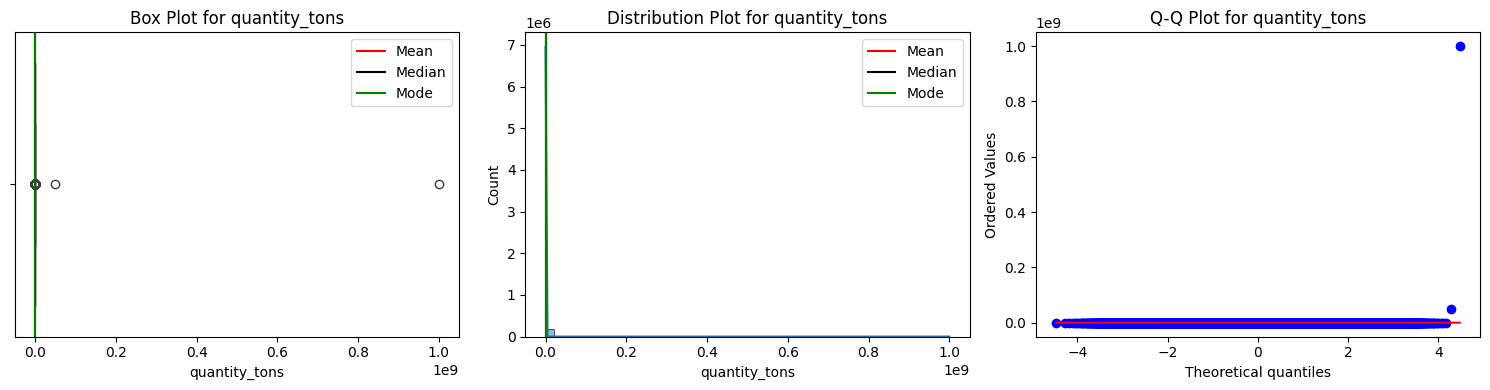

Skew for quantity_tons is 424.69


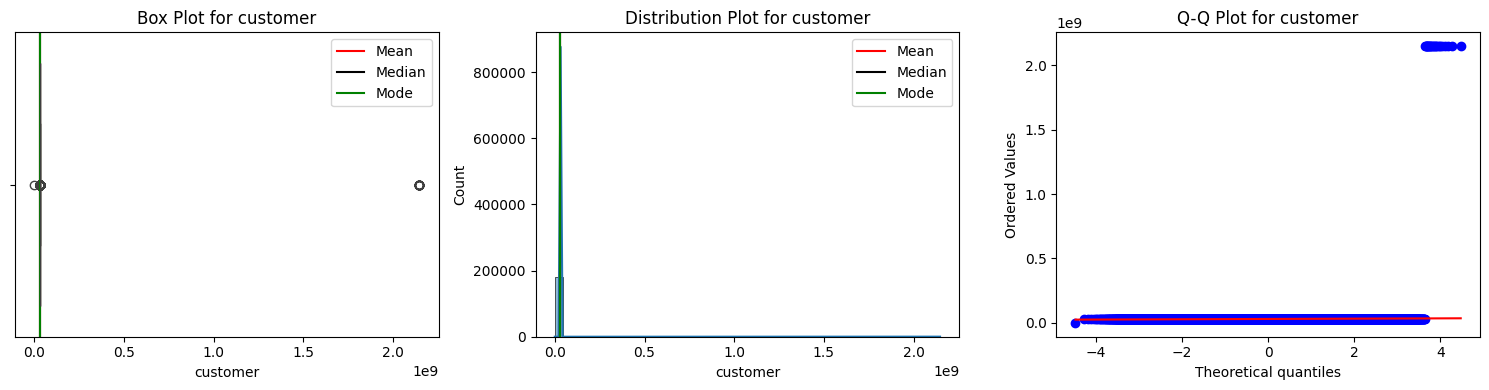

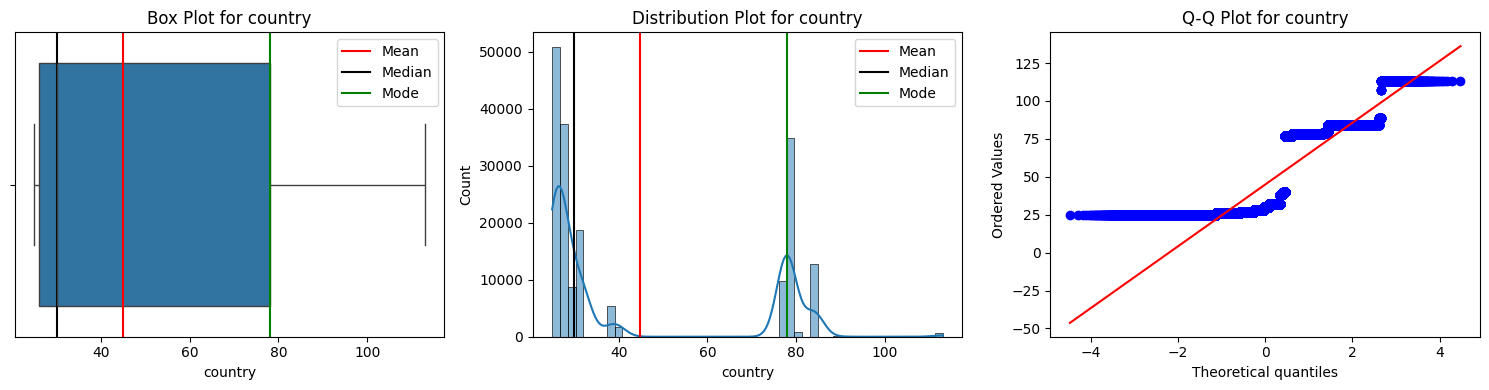

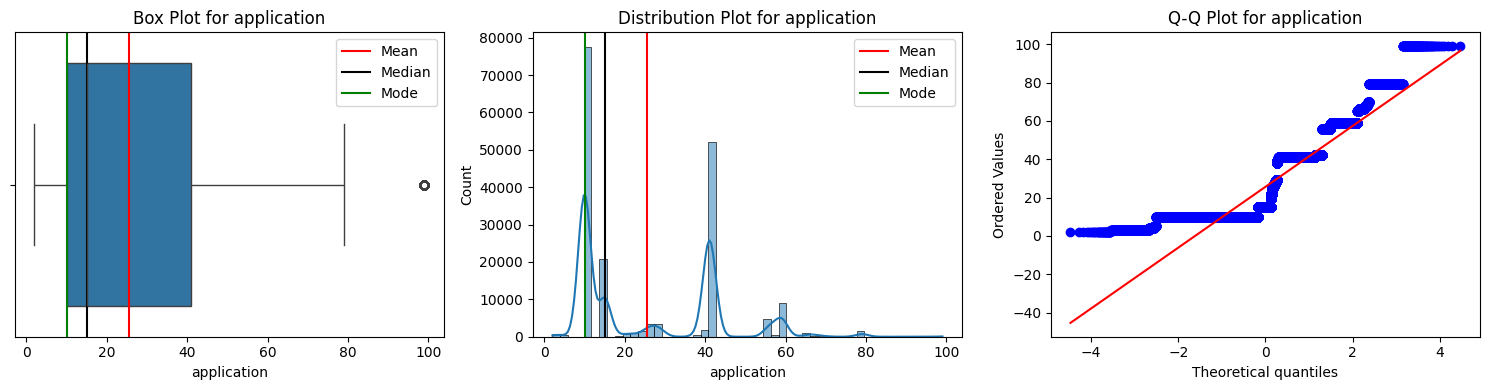

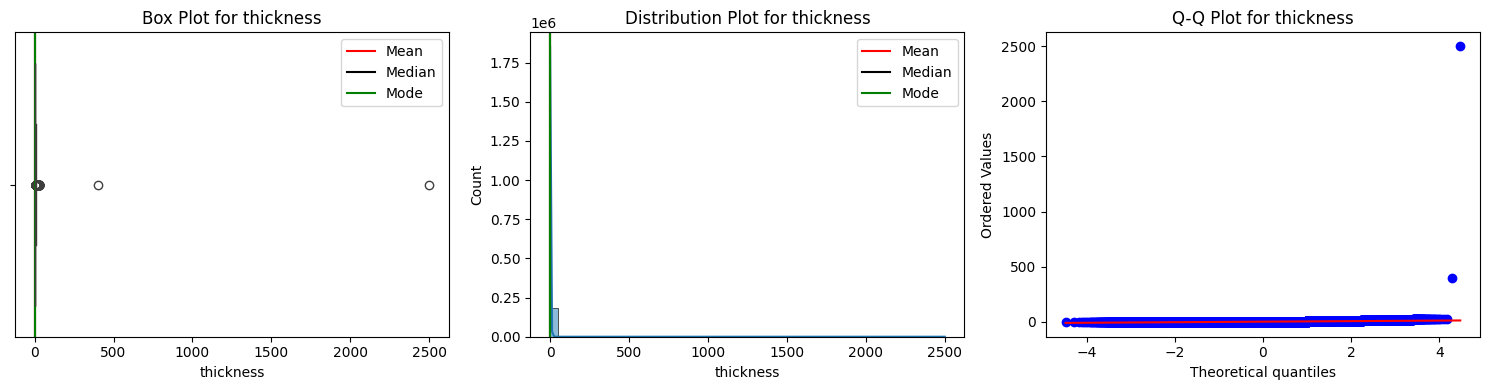

Skew for thickness is 303.45


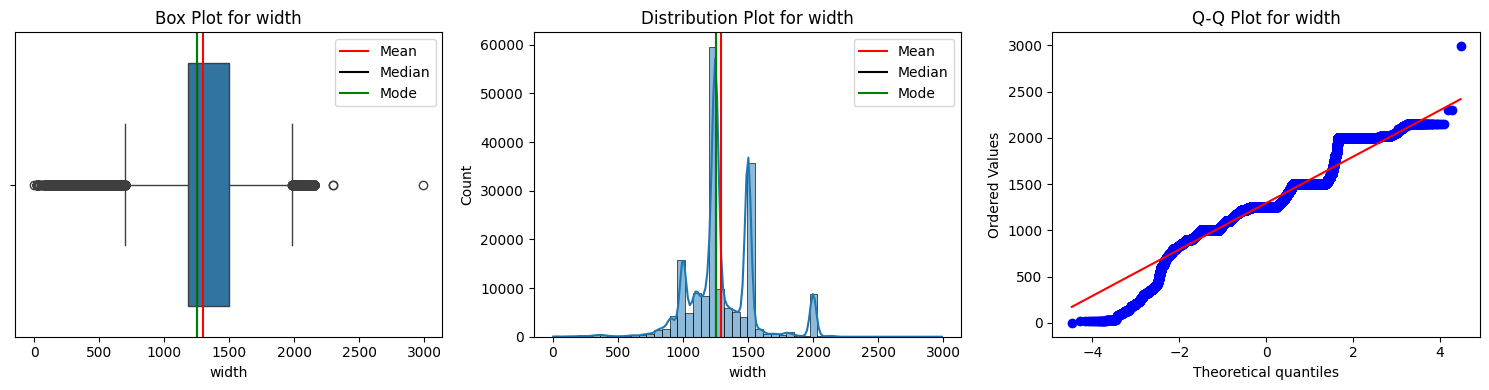

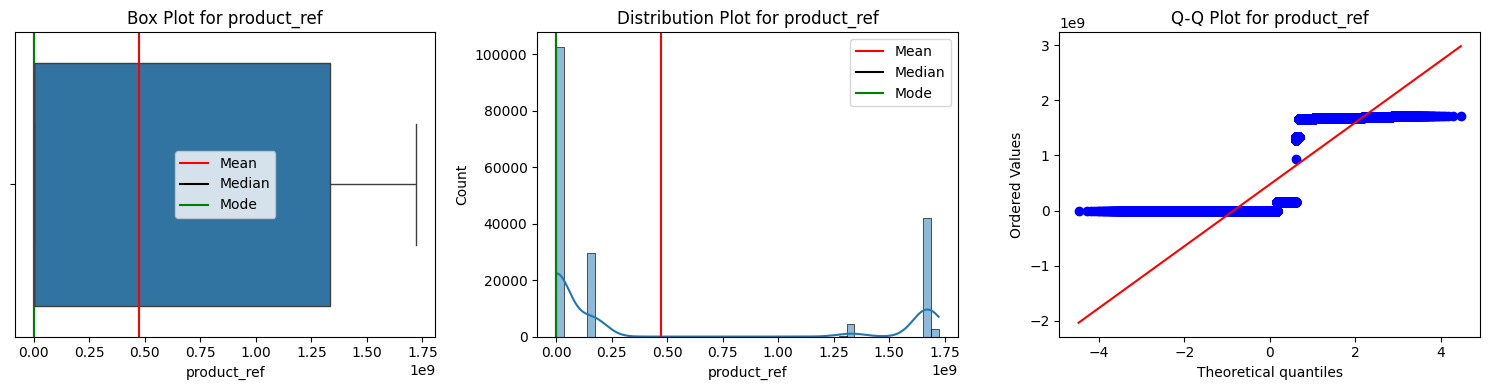

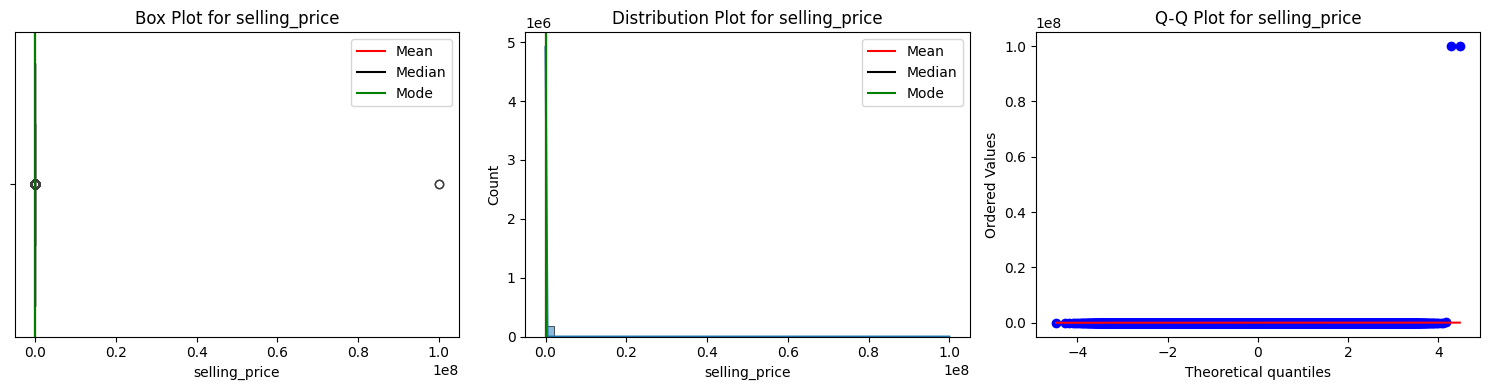

Skew for selling_price is 301.39


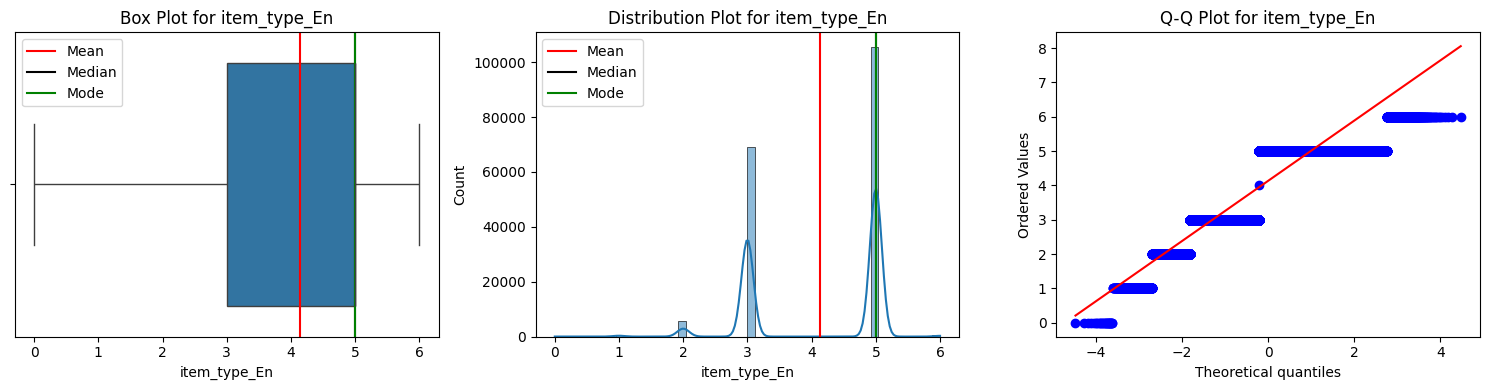

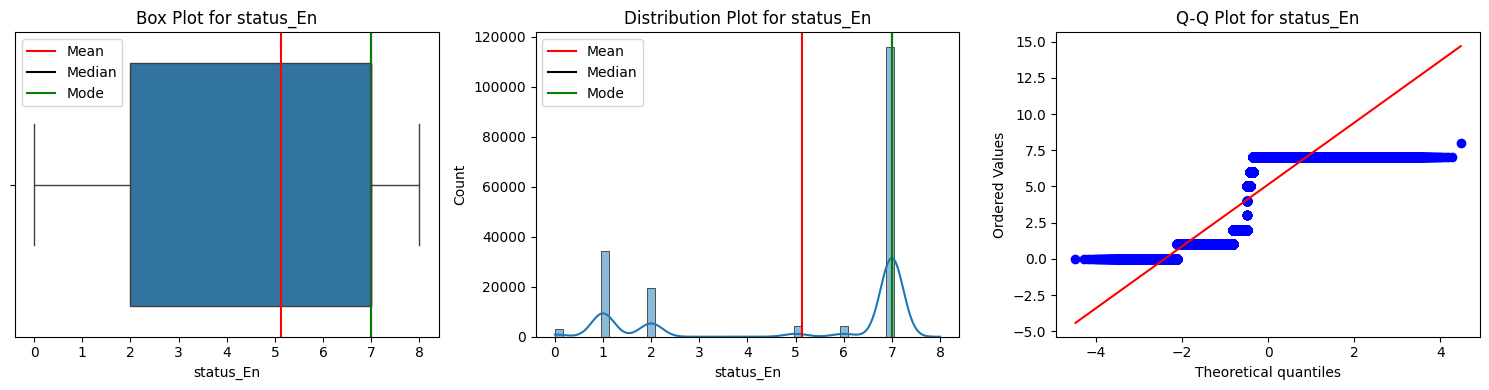

Skewed columns - ['quantity_tons', 'thickness', 'selling_price']


In [48]:
color_positive = '\033[92m'  # Green for positive skew
color_negative = '\033[91m'  # Red for negative skew
color_neutral = '\033[0m'  # Reset color for near-zero skew
skewed_col=[]
for i in data:
    plots(df1,i)
    if i in  ['quantity_tons', 'thickness', 'selling_price']:
        skew_val = skew_dict[i]
        color = color_neutral
        if skew_val > 0.5:
            color = color_positive
            skewed_col.append(i)
        elif skew_val < -0.5:
            color = color_negative
            skewed_col.append(i)
        print(f"{color}Skew for {i} is {skew_val:.2f}{color_neutral}")    
print(f"Skewed columns - {skewed_col}")

In [53]:
df2=df1.copy()

In [49]:
# def outlier(df, column,iqr_fact):
#     iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
#     upper_threshold = df[column].quantile(0.75) + (iqr_fact*iqr)
#     lower_threshold = df[column].quantile(0.25) - (iqr_fact*iqr)
#     df[column] = df[column].clip(lower_threshold, upper_threshold)
#     return df

In [243]:
# for i in ['quantity_tons','thickness','selling_price']:
#     outlier(df2,i,1.5)

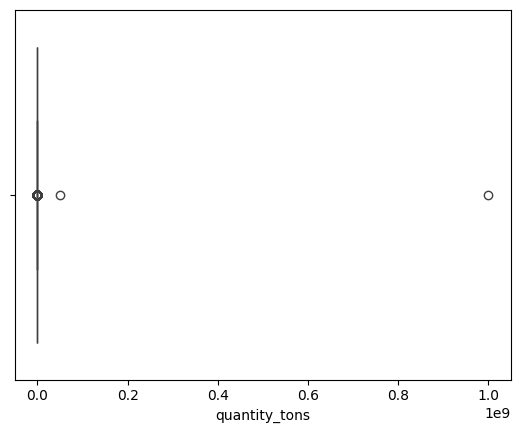

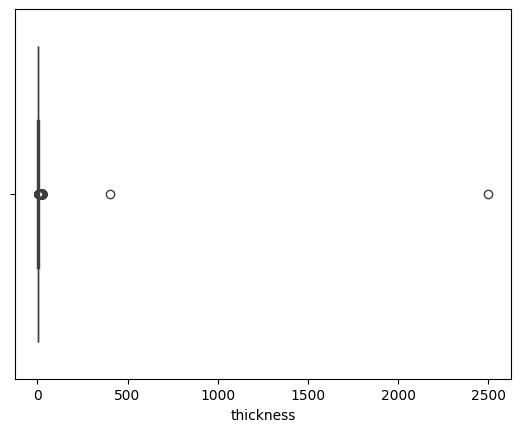

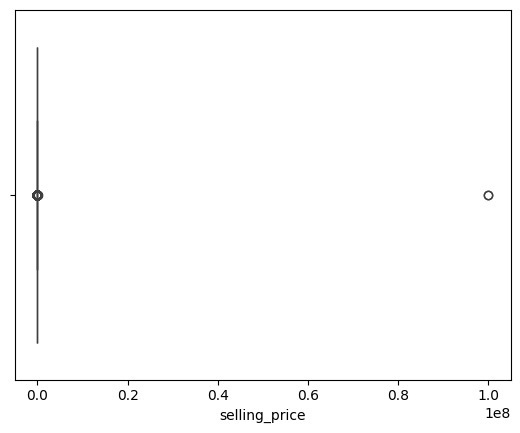

In [247]:
col=['quantity_tons','thickness','selling_price']
for i in col:
    sns.boxplot(data=df2,x=i)
    plt.show()

In [56]:
df2=df1.copy()
def zscore_outlier_handling(df,threshold=3,columns=None):
    columns = df.select_dtypes(include='number').columns.tolist()
    z_scores=stat.zscore(df[columns])
    outliers_mask = (np.abs(z_scores) > threshold).any(axis=1)
    for column in columns:
        median_value = df[column].median()
        df.loc[outliers_mask, column] = median_value

    return df

In [57]:
zscore_outlier_handling(df2,threshold=3) 

,id,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,product_ref,delivery_date,selling_price,item_type_En,status_En
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151138,30156308,28,Won,W,10,2.00,1500,1670798778,2021-07-01,854.00,5,7
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024841,30202938,25,Won,W,41,0.80,1210,1668701718,2021-04-01,1047.00,5,7
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127960,30153963,30,Won,WI,28,0.38,952,628377,2021-01-01,644.33,6,7
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411072,30349574,32,Won,S,59,2.30,1317,1668701718,2021-01-01,768.00,3,7
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526245,30211560,28,Won,W,10,4.00,2000,640665,2021-03-01,577.00,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,102.482422,30200854,25,Won,W,41,0.96,1220,164141591,2020-07-01,591.00,5,7
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,208.086472,30200854,25,Won,W,41,0.95,1500,164141591,2020-07-01,589.00,5,7
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,4.235594,30200854,25,Won,W,41,0.71,1250,164141591,2020-07-01,619.00,5,7
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,2020-07-02,30.365013,30200854,25,Won,W,41,0.85,1250,164141591,2020-07-01,601.00,5,7


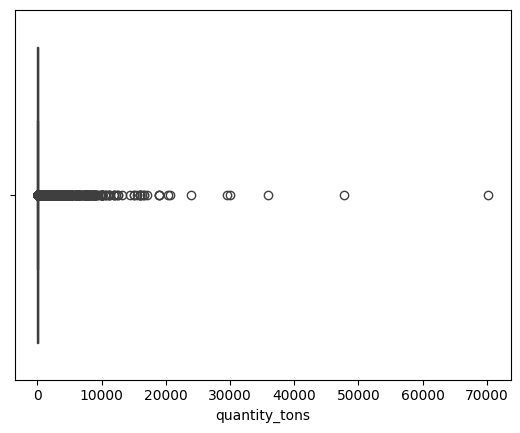

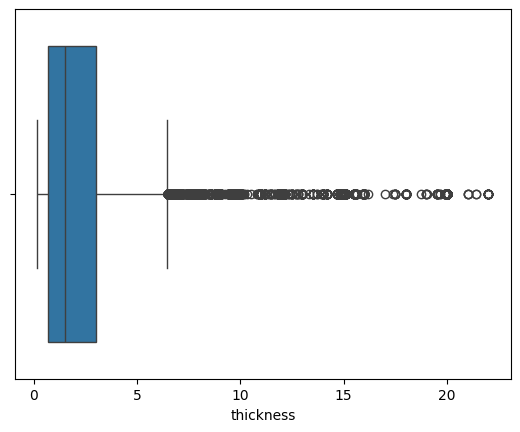

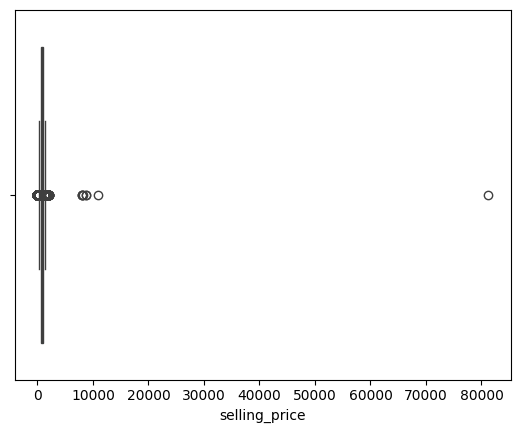

In [60]:
col=['quantity_tons','thickness','selling_price']
for i in col:
    sns.boxplot(data=df2,x=i)
    plt.show()

In [51]:
def boxcox_transform(x):
    # Perform Box-Cox transformation
    transformed_data = boxcox(x)[0]  # boxcox returns a tuple, we extract the first element
    return transformed_data

In [52]:
method_functions =  {
    'log': np.log,
    'square': np.sqrt,
    'rec': lambda x: 1 / x,
    'sig': lambda x: 1 / (1 + np.exp(-x)),
    'pow': lambda x: np.power(x, 2),
    'boxcox': boxcox_transform,
        }

def skewness(df, column, method):
    normalized_df=pd.DataFrame()

    for method_name, func in method_functions.items():
        for col in column:

            new_column = f'{col}_{method_name}'
            transformed_values = func(df[col])
            normalized_df[new_column] = transformed_values

    return normalized_df
columns=['quantity_tons','thickness','selling_price']
normalized_df=skewness(df2, columns, method_functions)

In [53]:
normalized_df

,quantity_tons_log,thickness_log,selling_price_log,quantity_tons_square,thickness_square,selling_price_square,quantity_tons_rec,thickness_rec,selling_price_rec,quantity_tons_sig,thickness_sig,selling_price_sig,quantity_tons_pow,thickness_pow,selling_price_pow,quantity_tons_boxcox,thickness_boxcox,selling_price_boxcox
0,3.991779,0.693147,6.749931,7.358746,1.414214,29.223278,0.018467,0.500000,0.001171,1.000000,0.880797,1.0,2932.345780,4.0000,7.293160e+05,6.388106,0.675994,469.366790
1,5.020212,-0.223144,6.953684,12.306237,0.894427,32.357379,0.006603,1.250000,0.000955,1.000000,0.689974,1.0,22935.121284,0.6400,1.096209e+06,9.160894,-0.224961,563.518176
2,5.020212,-0.967584,6.468211,12.306237,0.616441,25.383656,0.006603,2.631579,0.001552,1.000000,0.593873,1.0,22935.121284,0.1444,4.151611e+05,9.160894,-1.002383,364.483015
3,5.020212,0.832909,6.643790,12.306237,1.516575,27.712813,0.006603,0.434783,0.001302,1.000000,0.908877,1.0,22935.121284,5.2900,5.898240e+05,9.160894,0.808224,426.716448
4,5.020212,1.386294,6.357842,12.306237,2.000000,24.020824,0.006603,0.250000,0.001733,1.000000,0.982014,1.0,22935.121284,16.0000,3.329290e+05,9.160894,1.318808,330.084748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,4.629691,-0.040822,6.381816,10.123360,0.979796,24.310492,0.009758,1.041667,0.001692,1.000000,0.723122,1.0,10502.646793,0.9216,3.492810e+05,8.033646,-0.040883,337.270331
181669,5.020212,-0.051293,6.378426,12.306237,0.974679,24.269322,0.006603,1.052632,0.001698,1.000000,0.721115,1.0,22935.121284,0.9025,3.469210e+05,9.160894,-0.051389,336.244920
181670,1.443524,-0.342490,6.428105,2.058056,0.842615,24.879711,0.236094,1.408451,0.001616,0.985735,0.670401,1.0,17.940255,0.5041,3.831610e+05,1.698591,-0.346784,351.588545
181671,3.413291,-0.162519,6.398595,5.510446,0.921954,24.515301,0.032933,1.176471,0.001664,1.000000,0.700567,1.0,922.034022,0.7225,3.612010e+05,5.082646,-0.163482,342.391964


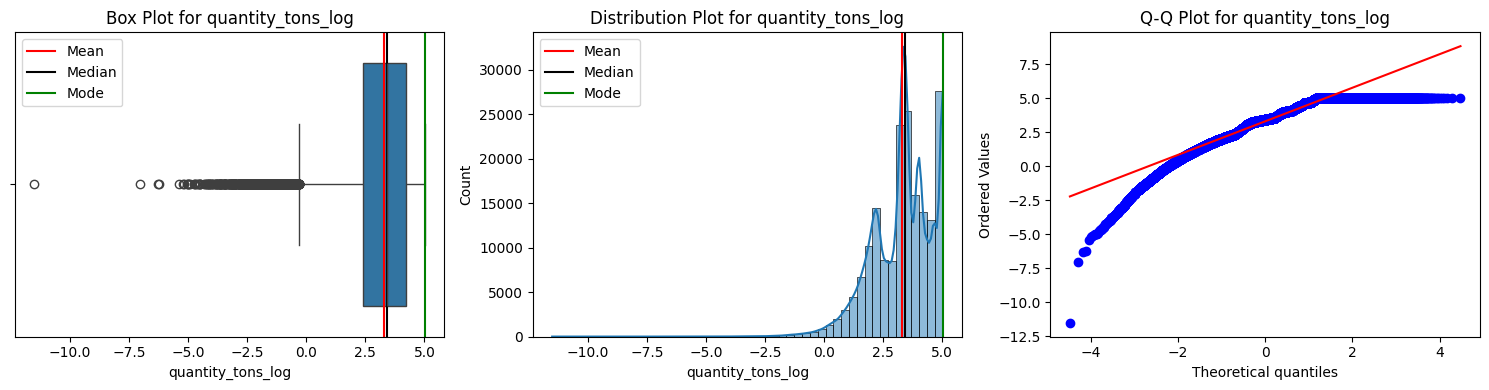

Skenewss of quantity_tons_log = -0.7883778927446471


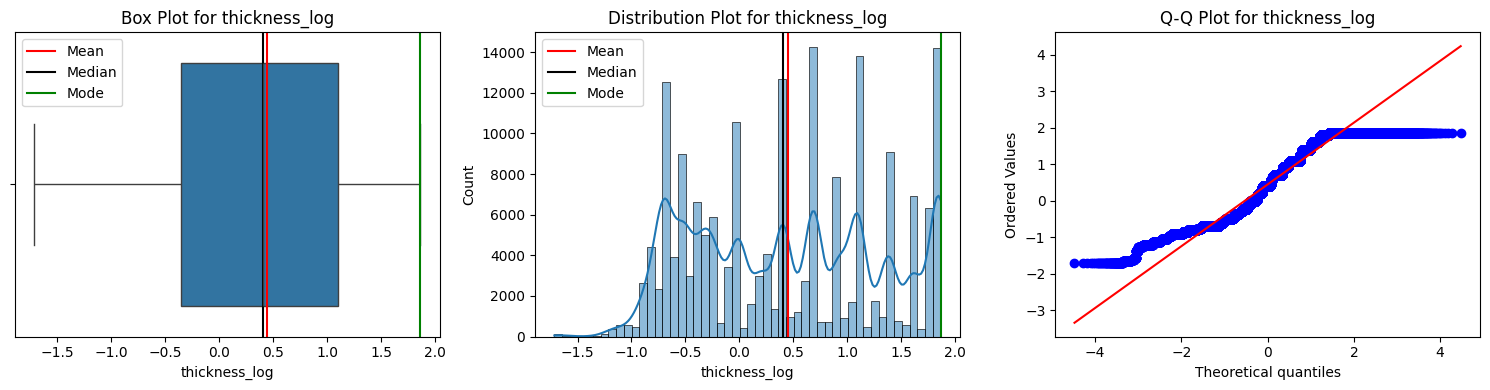

Skenewss of thickness_log = 0.10095131880299194


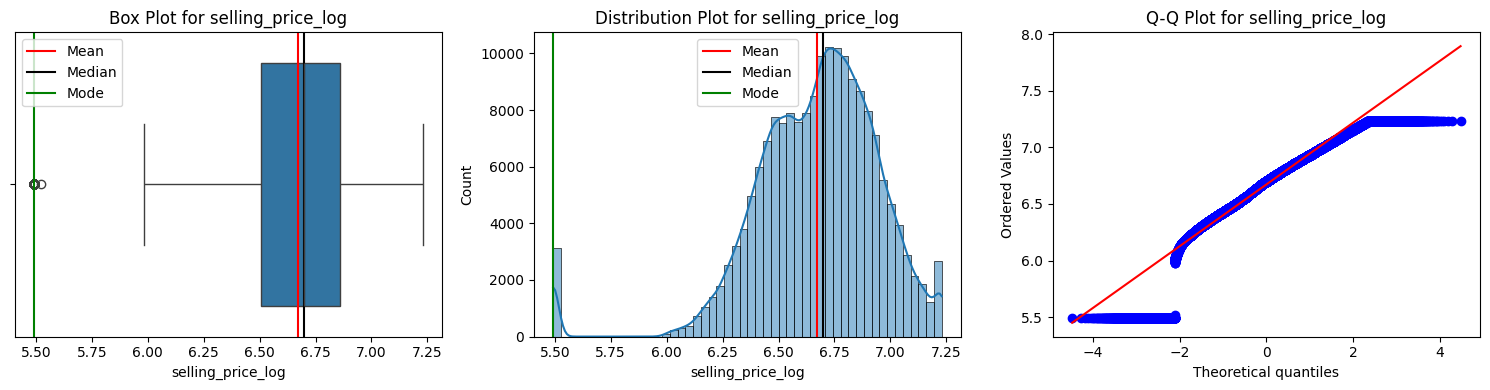

Skenewss of selling_price_log = -1.151883765130167


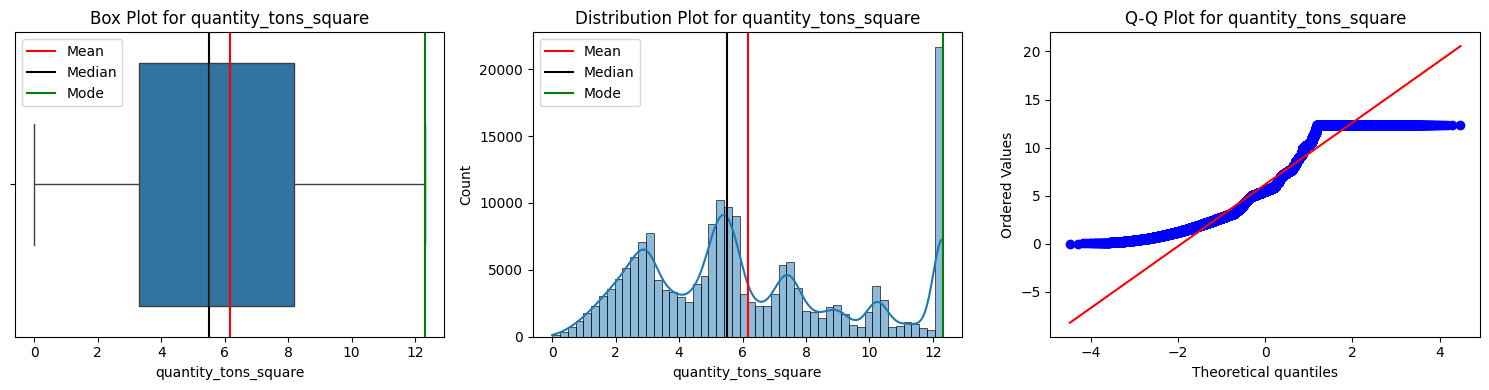

Skenewss of quantity_tons_square = 0.507204960866602


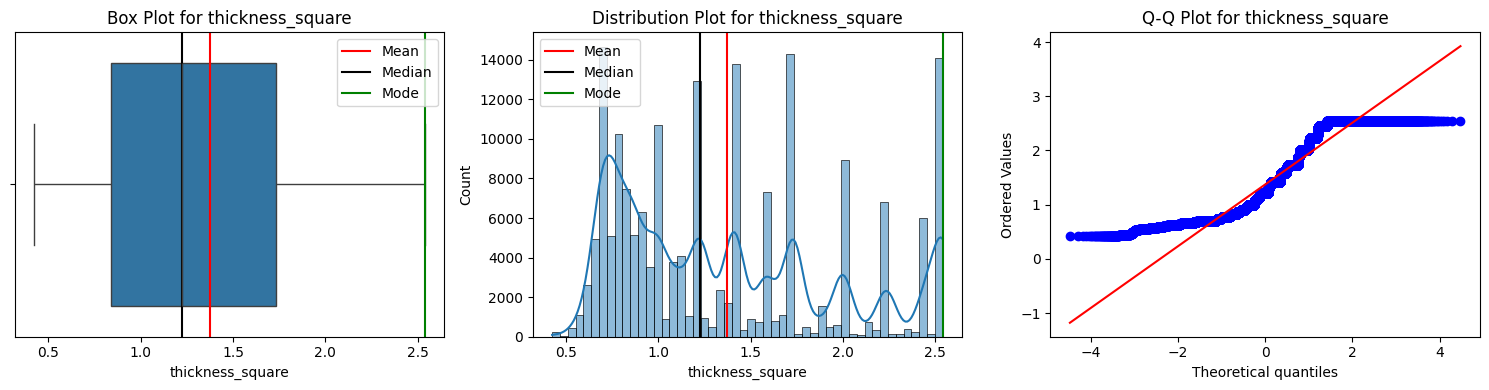

Skenewss of thickness_square = 0.6089243439431077


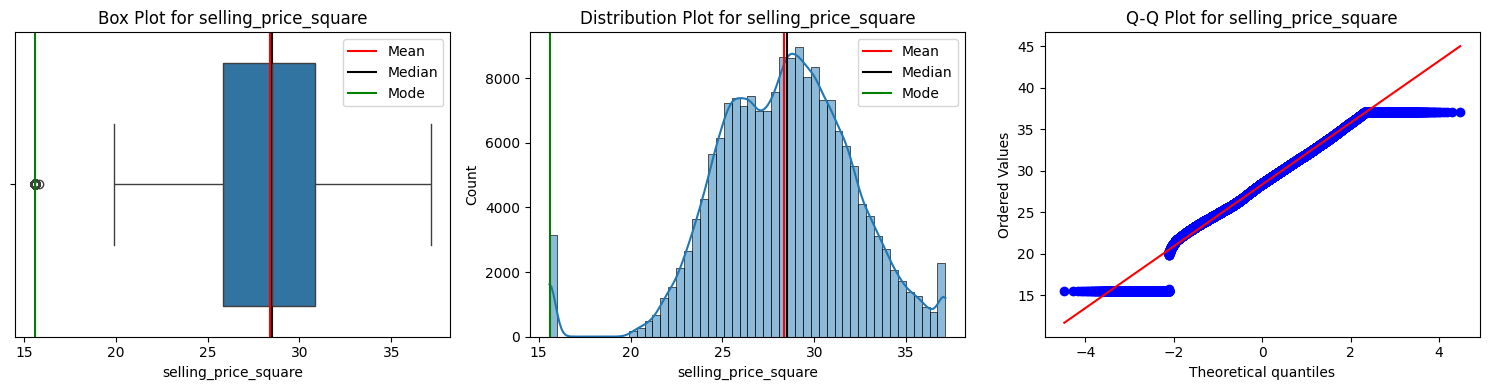

Skenewss of selling_price_square = -0.40454561548392975


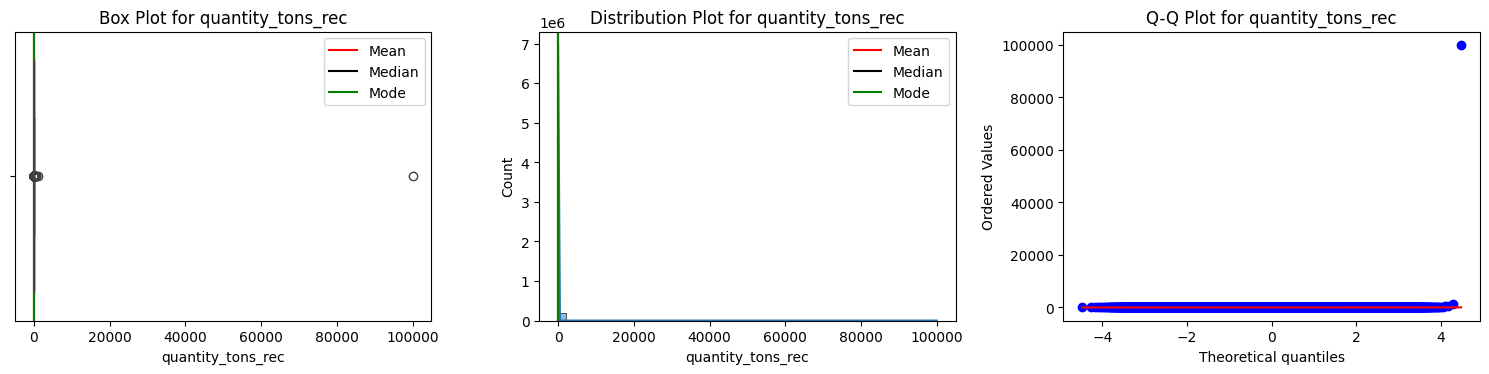

Skenewss of quantity_tons_rec = 426.0858898362051


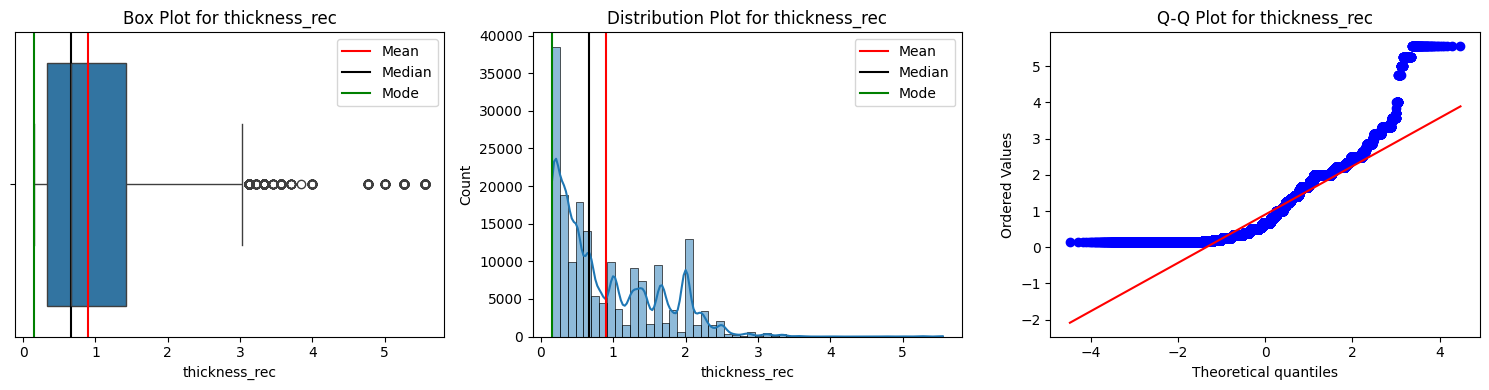

Skenewss of thickness_rec = 1.0596899825243864


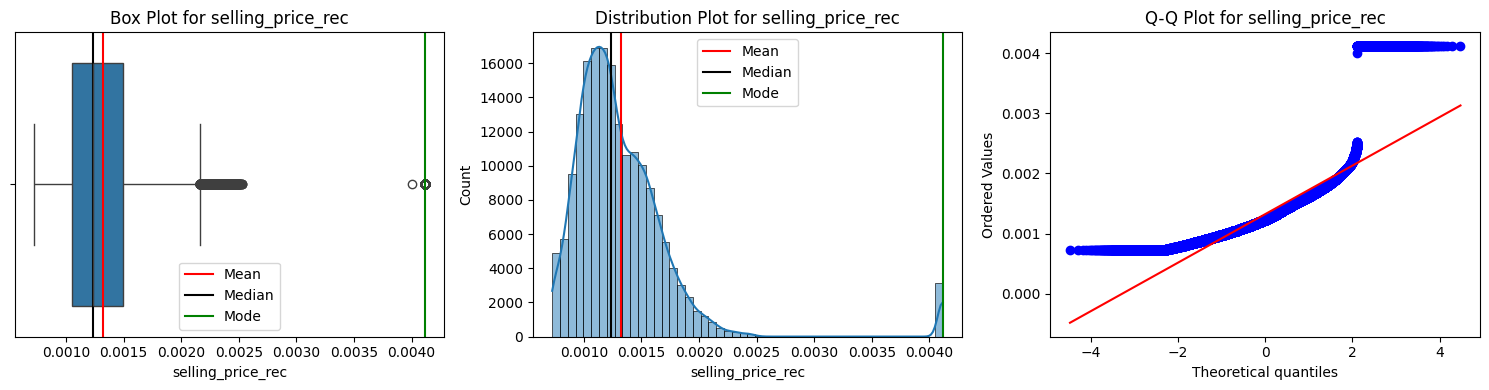

Skenewss of selling_price_rec = 3.43580050848589


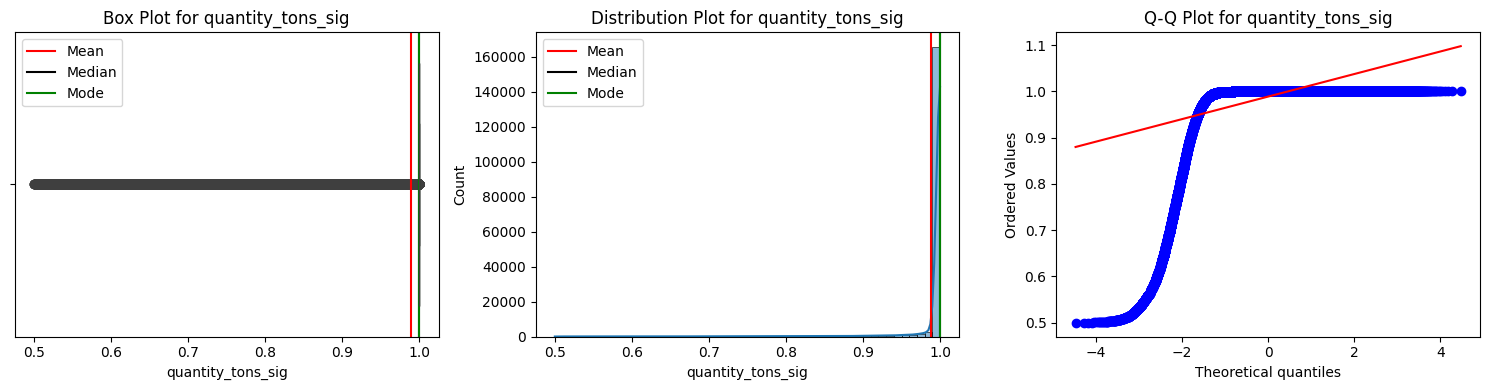

Skenewss of quantity_tons_sig = -6.125422161675817


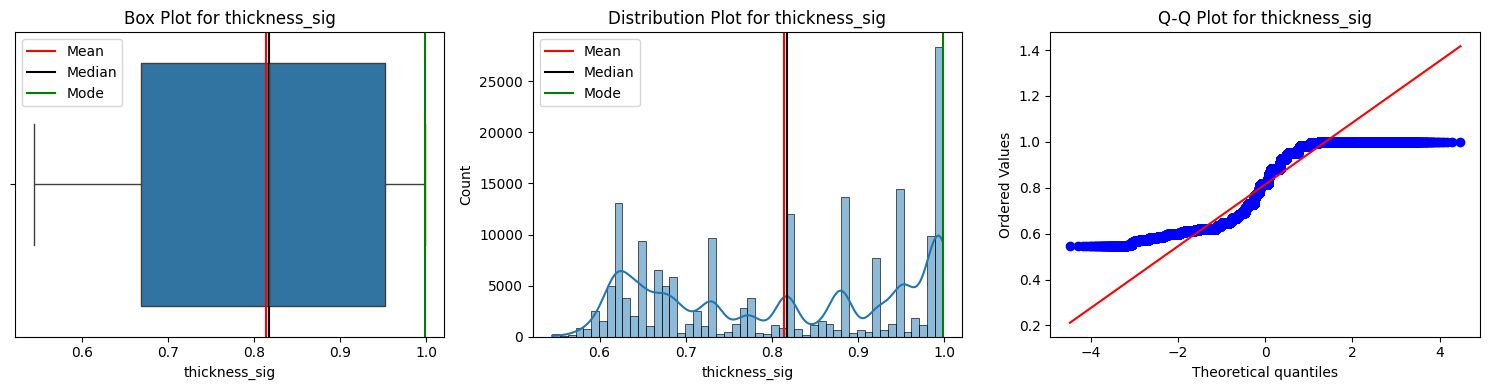

Skenewss of thickness_sig = -0.09223504943311463


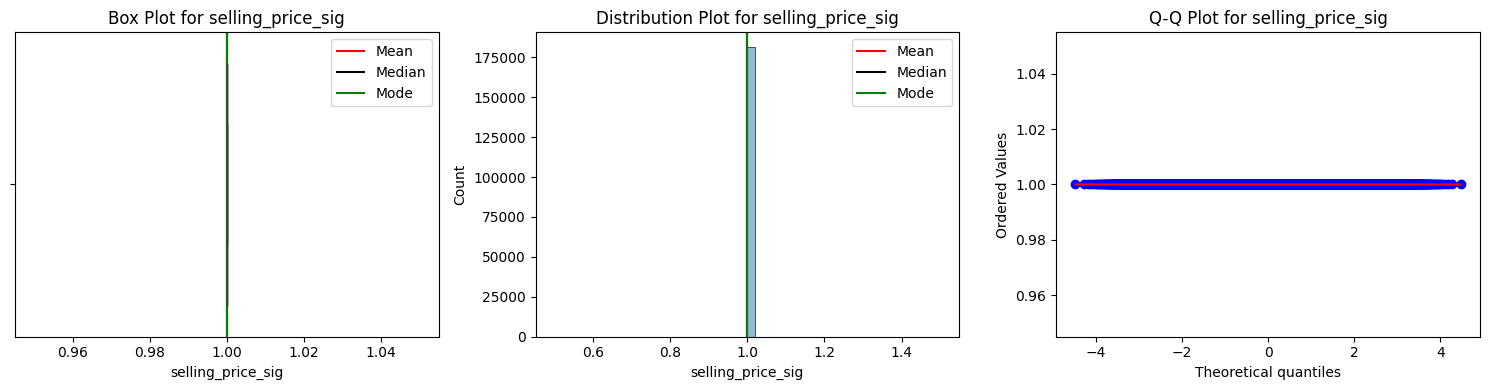

Skenewss of selling_price_sig = 0.0


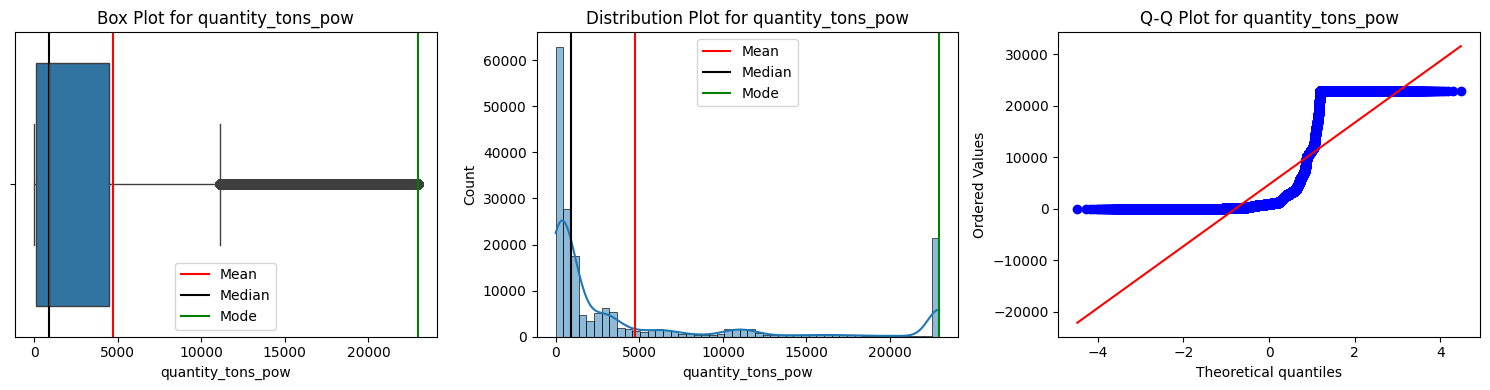

Skenewss of quantity_tons_pow = 1.6855667747015979


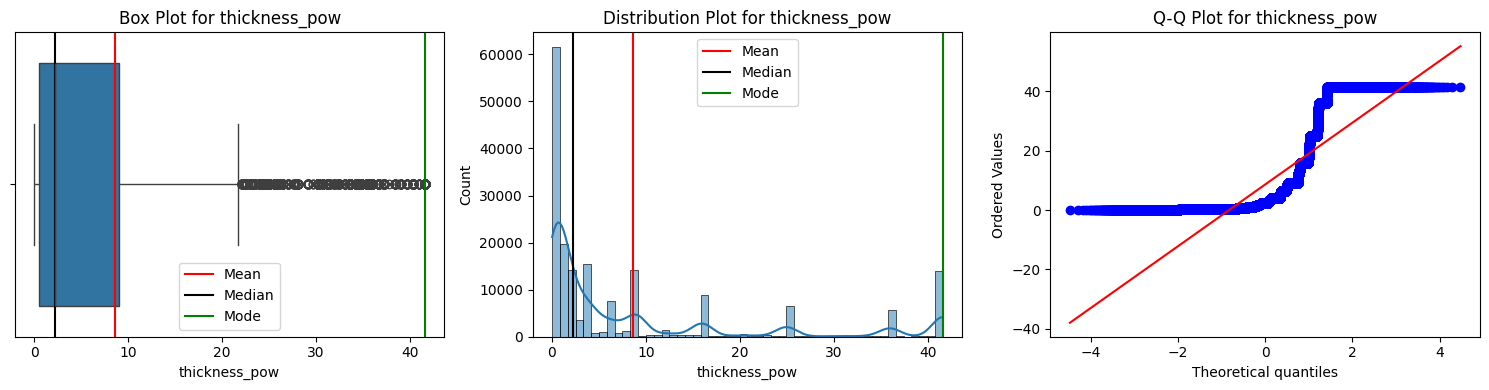

Skenewss of thickness_pow = 1.691183738053465


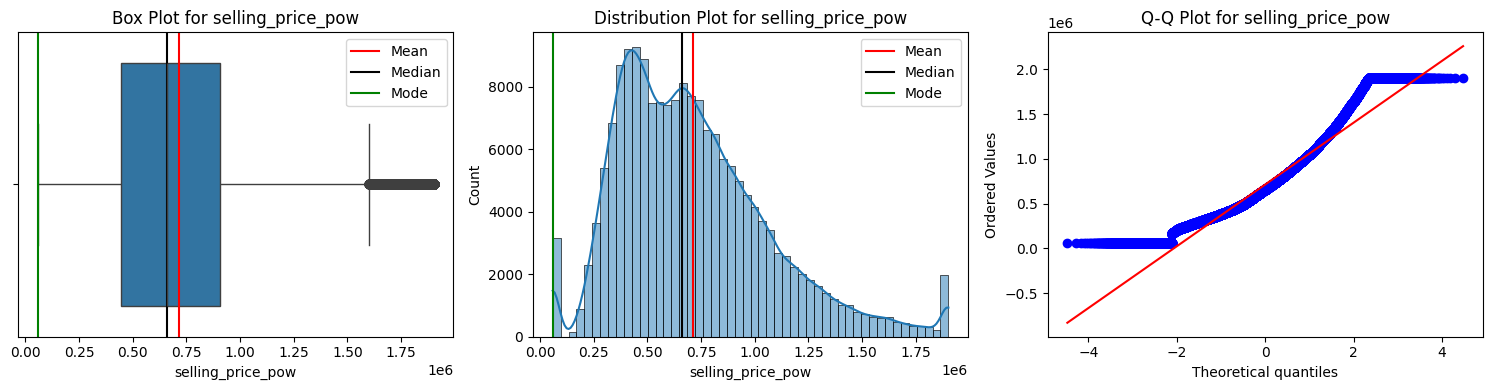

Skenewss of selling_price_pow = 0.9214058785591981


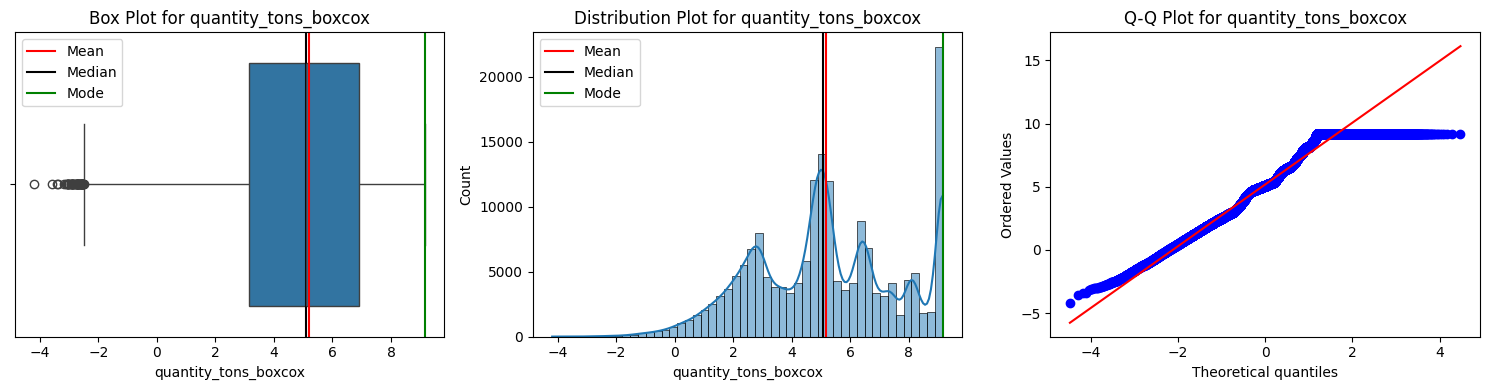

Skenewss of quantity_tons_boxcox = -0.05962082759113481


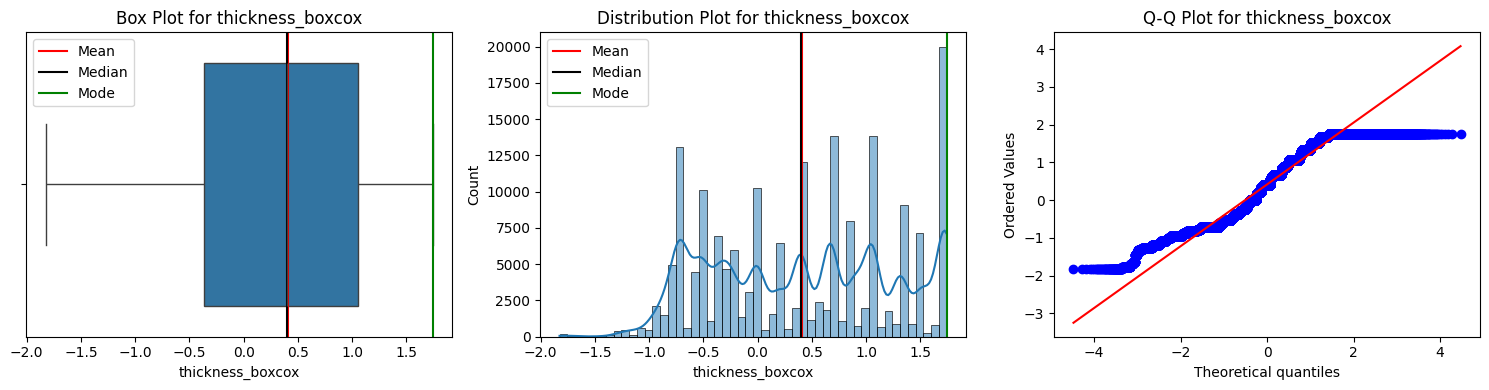

Skenewss of thickness_boxcox = 0.02527892164181112


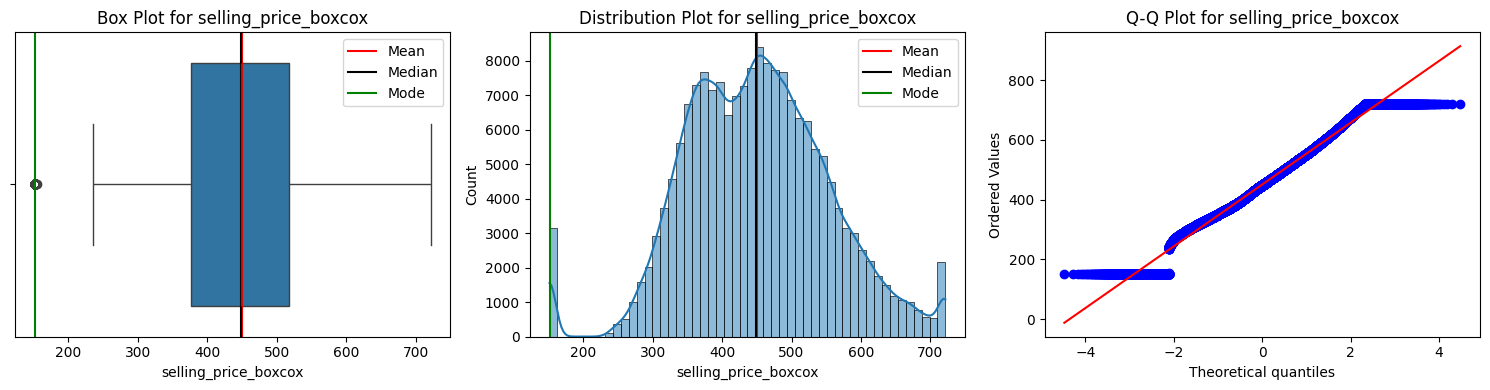

Skenewss of selling_price_boxcox = 0.036101290455574


In [54]:
for i in normalized_df.columns:
    plots(normalized_df,i)
    print(f'Skenewss of {i} = {normalized_df[i].skew()}')

In [55]:
df2.head()

,id,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,product_ref,delivery_date,selling_price,status_En,item_type_En
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151138,30156308,28,Won,W,10,2.00,1500,1670798778,2021-07-01,854.00,1,5
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,151.443459,30202938,25,Won,W,41,0.80,1210,1668701718,2021-04-01,1047.00,1,5
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,151.443459,30153963,30,Won,WI,28,0.38,952,628377,2021-01-01,644.33,1,6
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,151.443459,30349574,32,Won,S,59,2.30,1317,1668701718,2021-01-01,768.00,1,3
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,151.443459,30211560,28,Won,W,10,4.00,2000,640665,2021-03-01,577.00,1,5


In [56]:
df2['quantity_tons_boxcox'] = boxcox_transform(df2['quantity_tons'])
df2['thickness_boxcox'] = boxcox_transform(df2['thickness'])
df2['selling_price_boxcox'] = boxcox_transform(df2['selling_price'])
df2.head()

,id,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,product_ref,delivery_date,selling_price,status_En,item_type_En,quantity_tons_boxcox,thickness_boxcox,selling_price_boxcox
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151138,30156308,28,Won,W,10,2.00,1500,1670798778,2021-07-01,854.00,1,5,6.388106,0.675994,469.366790
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,151.443459,30202938,25,Won,W,41,0.80,1210,1668701718,2021-04-01,1047.00,1,5,9.160894,-0.224961,563.518176
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,151.443459,30153963,30,Won,WI,28,0.38,952,628377,2021-01-01,644.33,1,6,9.160894,-1.002383,364.483015
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,151.443459,30349574,32,Won,S,59,2.30,1317,1668701718,2021-01-01,768.00,1,3,9.160894,0.808224,426.716448
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,151.443459,30211560,28,Won,W,10,4.00,2000,640665,2021-03-01,577.00,1,5,9.160894,1.318808,330.084748


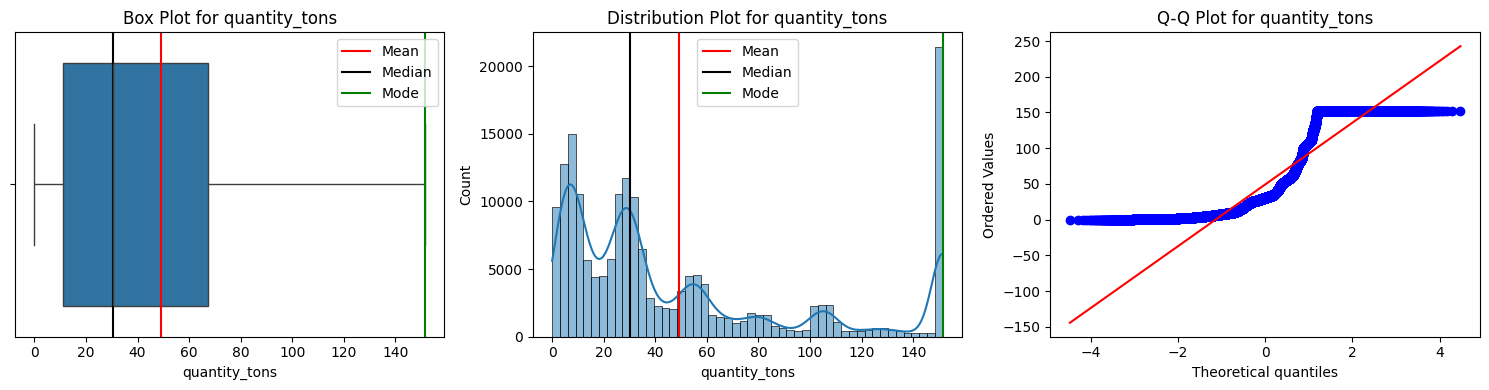

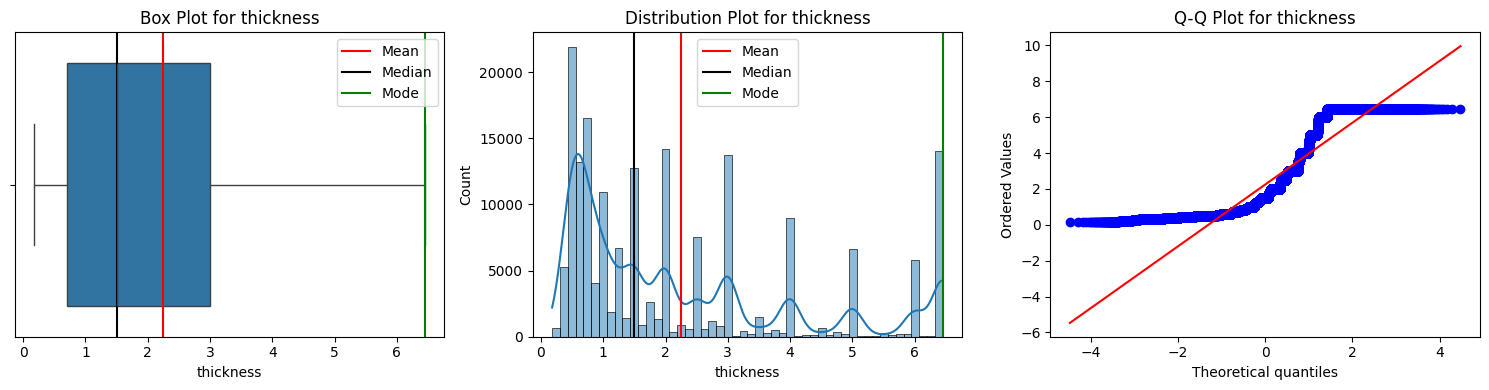

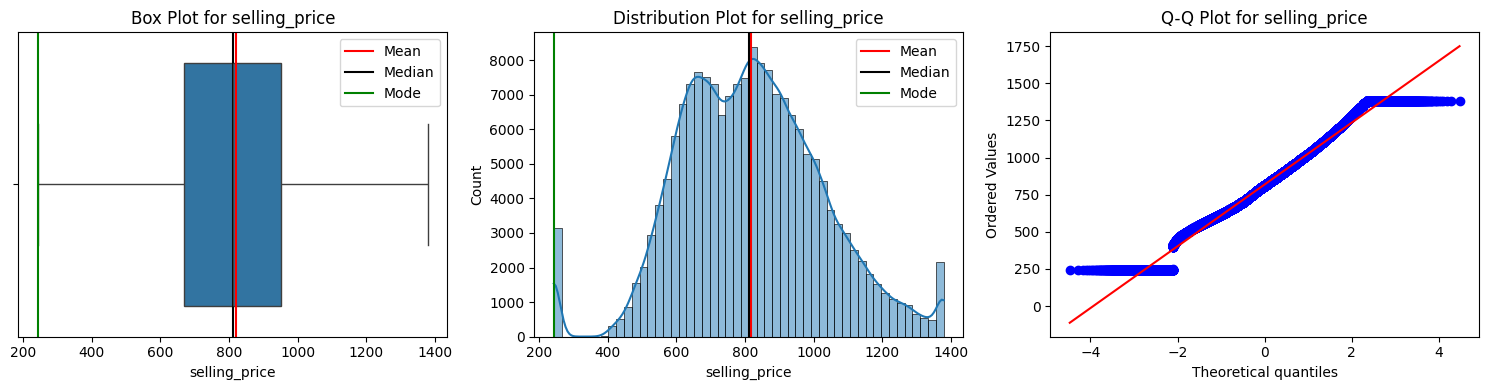

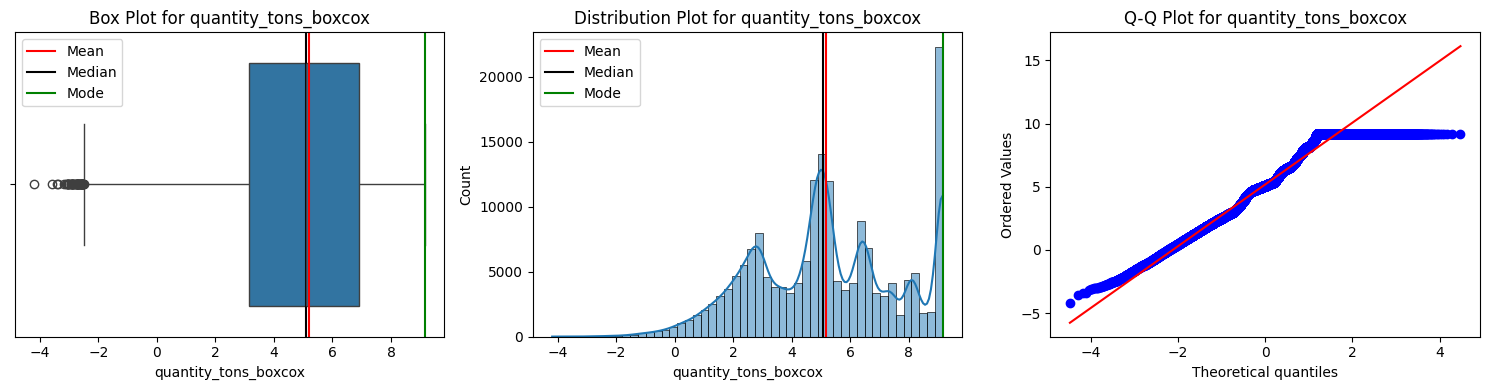

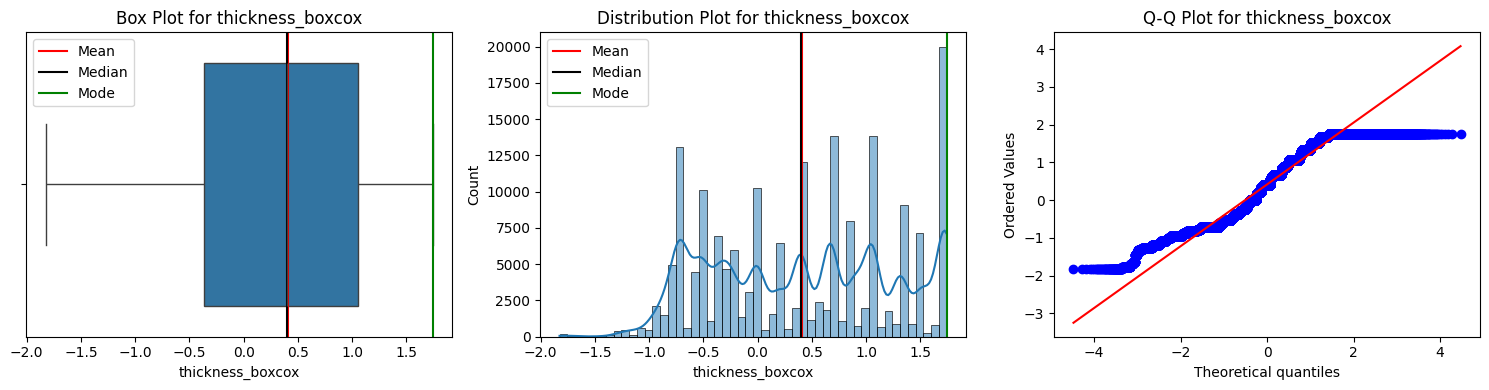

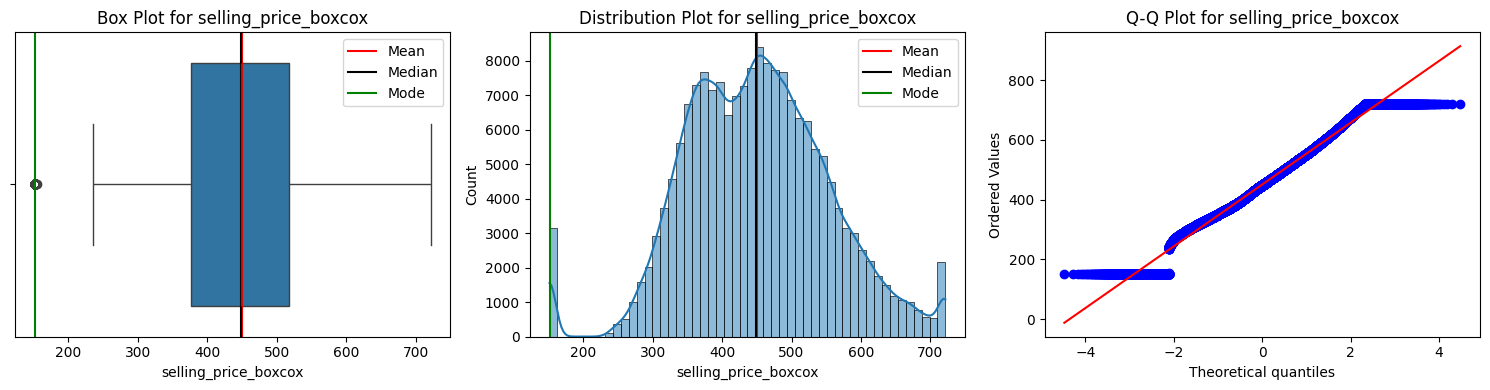

Skewed columns - []


In [58]:
color_positive = '\033[92m'  # Green for positive skew
color_negative = '\033[91m'  # Red for negative skew
color_neutral = '\033[0m'  # Reset color for near-zero skew
skewed_col=[]
for i in  ['quantity_tons', 'thickness', 'selling_price','quantity_tons_boxcox','thickness_boxcox','selling_price_boxcox']:
    plots(df2,i)
    if i in 'boxcox':
        skew_val = skew_dict[i]
        color = color_neutral
        if skew_val > 0.5:
            color = color_positive
            skewed_col.append(i)
        elif skew_val < -0.5:
            color = color_negative
            skewed_col.append(i)
        print(f"{color}Skew for {i} is {skew_val:.2f}{color_neutral}")    
print(f"Skewed columns - {skewed_col}")

In [72]:
cor = df2[['quantity_tons', 'thickness', 'selling_price', 
          'quantity_tons_boxcox', 'thickness_boxcox', 'selling_price_boxcox']]
correlation_matrix = cor.corr()
correlation_matrix

,quantity_tons,thickness,selling_price,quantity_tons_boxcox,thickness_boxcox,selling_price_boxcox
quantity_tons,1.000000,0.002776,-0.041790,0.919349,0.021429,-0.040948
thickness,0.002776,1.000000,-0.363819,0.024481,0.926832,-0.360755
selling_price,-0.041790,-0.363819,1.000000,-0.032713,-0.442412,0.999744
quantity_tons_boxcox,0.919349,0.024481,-0.032713,1.000000,0.038479,-0.031627
thickness_boxcox,0.021429,0.926832,-0.442412,0.038479,1.000000,-0.437858
selling_price_boxcox,-0.040948,-0.360755,0.999744,-0.031627,-0.437858,1.000000
